In [1]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1)
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [2]:
import numpy as np
import matplotlib as mlp
import matplotlib.pyplot as plt

In [3]:
X, y = mnist['data'], mnist['target']
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

param_grid = {'n_neighbors': [2,4,5,7,10],
    'weights': ['uniform', 'distance']
    #'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']
    }

In [4]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

kn_clf = KNeighborsClassifier()
grid_search = GridSearchCV(kn_clf, param_grid,scoring='accuracy')

In [5]:
grid_search.fit(X_train, y_train)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [2, 4, 5, 7, 10],
                         'weights': ['uniform', 'distance']},
             scoring='accuracy')

In [11]:

y_pred = grid_search.predict(X_test)

In [12]:
from sklearn.metrics import confusion_matrix, accuracy_score
conf_matrix = confusion_matrix(y_test, y_pred)

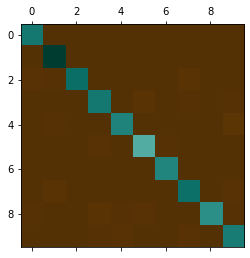

In [13]:
plt.matshow(conf_matrix, cmap=plt.cm.BrBG)
plt.show()

In [25]:
accuracy_score(y_test, y_pred)

0.9714

In [26]:
from sklearn.model_selection import cross_val_score
cross_val_score(grid_search, X_train, y_train, cv=3, scoring="accuracy")

array([0.9709 , 0.9698 , 0.97035])